<a href="https://colab.research.google.com/github/saulyaguana/404-Not-Found-project-/blob/main/Color_Images_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. COLOR IMAGES

+ Reading and displaying color images is the main thing in this notebook.
+ Cover splitting and merging of color channels and converting between different color spaces.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

+ The NumPy array right down has a third dimention wich is **indicating the three color channels** that we just read in which represent RGB.
+ The reason of the color is that OpenCV uses a BGR channel order format which is a little bit unconventional and matplotlib is expecting RGB.

In [ ]:
# Read the image
logo = 'facebook_logo.jpg'
logo_img = cv2.imread(logo, cv2.IMREAD_COLOR)

# Print the size of the imag
print(f'The size of the image is: {logo_img.shape}')

The size of the image is: (301, 800, 3)


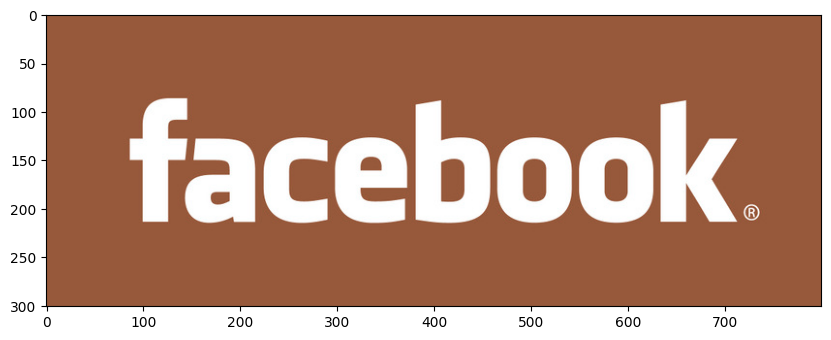

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(logo_img);

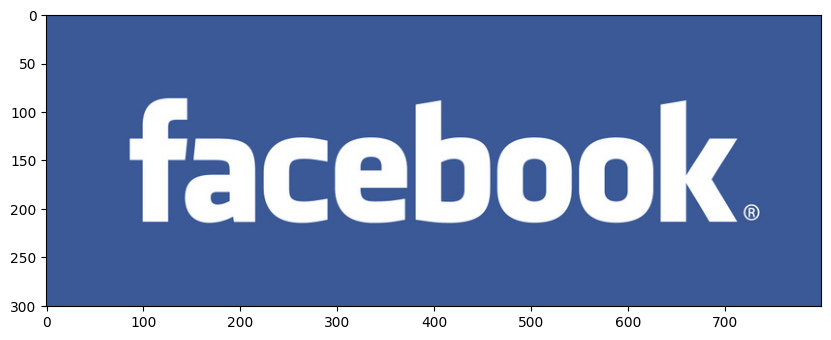

In [ ]:
# Swap the Red and Blue color channels.
logo_img = logo_img[:, :, ::-1]

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(logo_img);

+ The reason of the black background of the image below is that png files actually support a fourth channel called **the alpha channel**.
+ When we read this image in using this color specification that essentially discarted the alpha channel from being loaded into memory.

Image size is: (205, 1025, 3)


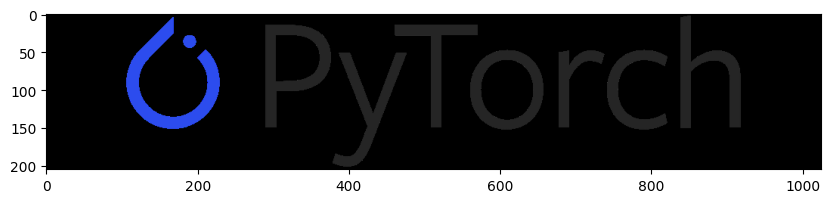

In [ ]:
# Read the image.
logo = 'Pytorch_logo.png'
logo_img = cv2.imread(logo, cv2.IMREAD_COLOR)

# Print the size of the image.
print(f'Image size is: {logo_img.shape}')

# Display the image.
plt.figure(figsize=(10, 10))
plt.imshow(logo_img);

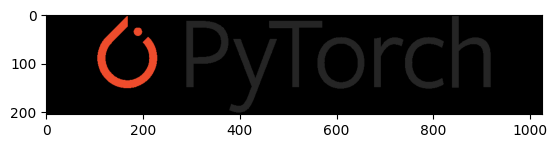

In [ ]:
lg = logo_img[:, :, ::-1]
plt.imshow(lg)

+ IMREAD_UNCHANGED allows to read in all the channels that are contained in the file.
+ The simple fact that there is a fourth channel is that it masks to all these background pixels, so that appear transparent.

(205, 1025, 4)


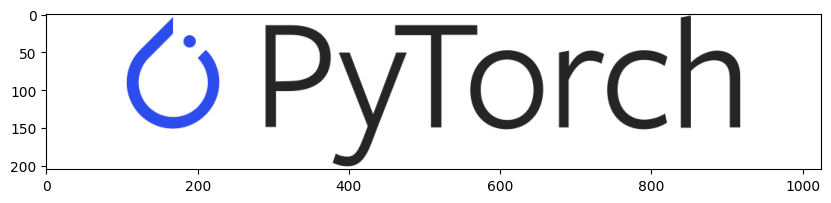

In [ ]:
# Read the image.
logo = 'Pytorch_logo.png'
logo_img = cv2.imread(logo, cv2.IMREAD_UNCHANGED)

# Print the size of the image.
print(logo_img.shape)

# Display the image.
plt.figure(figsize=(10, 10))
plt.imshow(logo_img);

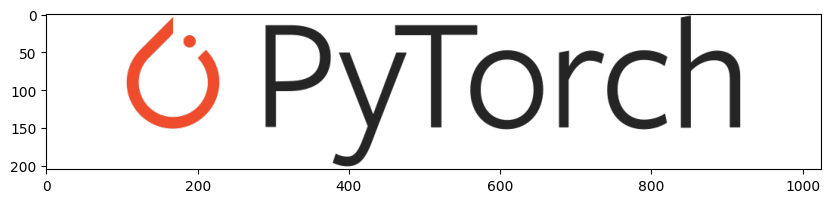

In [ ]:
# Swap the Red and Blue color channels using: cv2.COLOR_BGRA2RGBA.
logo_img = cv2.cvtColor(logo_img, cv2.COLOR_BGRA2RGBA)

# Display the image.
plt.figure(figsize=(10, 10))
plt.imshow(logo_img);

### Splitting and merging of color channels

+ These functions are both very straightfoward to use in OpenCV.
+ The *split* function takes as input the numpy array and splits into its individual channel.

#### Lets talk about some of these individual channels.

+ The interpretation here is that this grayscale image for the red channel is the intensity component of the red color in the image.

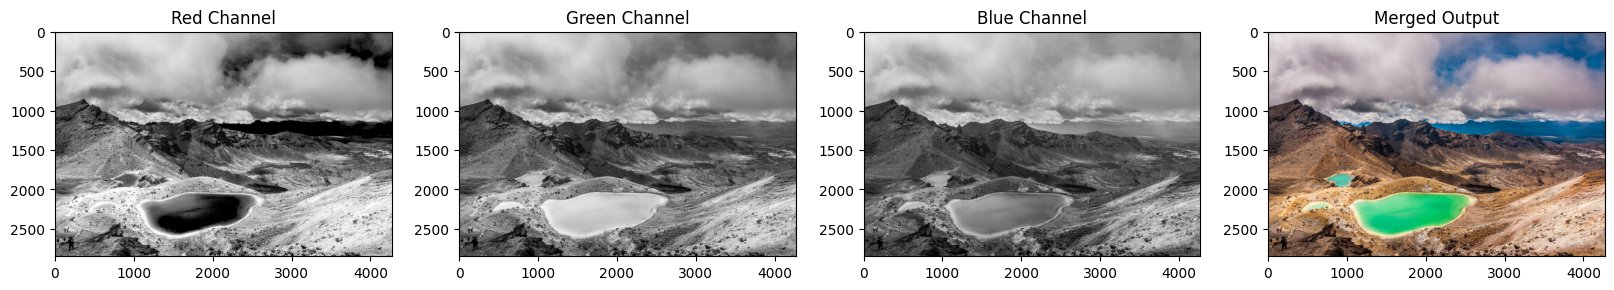

In [ ]:
# Split the image into B, G, R components.
img_bgr = cv2.imread("Emerald_Lakes_New_Zealand.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_bgr)

# Show the channels.
plt.figure(figsize=(20, 10))
plt.subplot(141); plt.imshow(r); plt.title("Red Channel")
plt.subplot(142); plt.imshow(g); plt.title("Green Channel")
plt.subplot(143); plt.imshow(b); plt.title("Blue Channel")

# Merge the individual channels into a BGR image.
imgMerged = cv2.merge((r, g, b))

# Display the merged output.
plt.subplot(144)
plt.imshow(imgMerged)
plt.title("Merged Output");

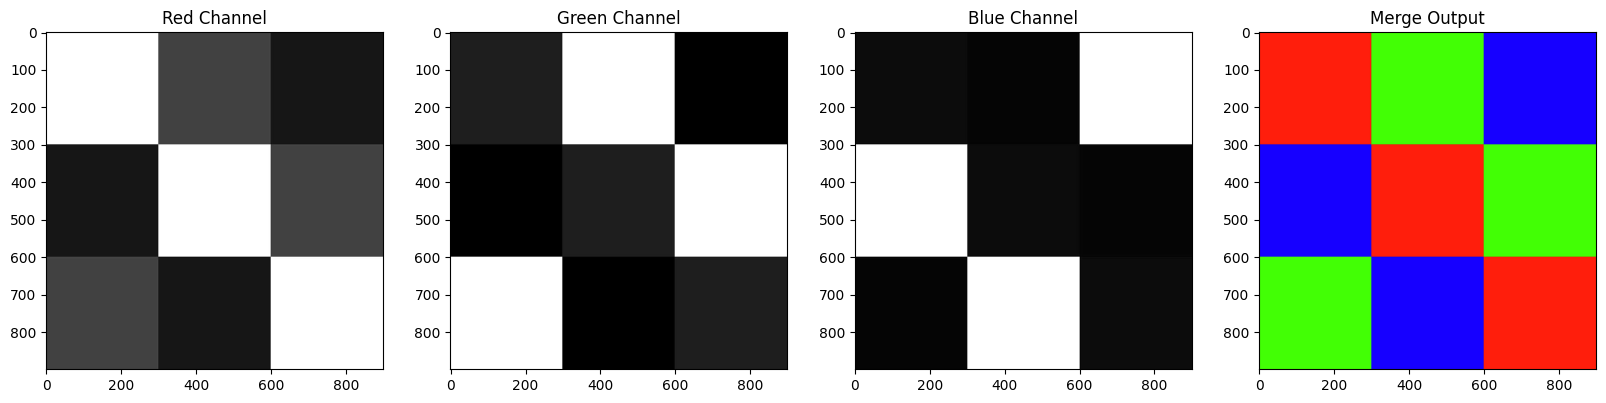

In [ ]:
aw = cv2.imread("rgb.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(aw)
mergeOut = cv2.merge((r, g, b))

# Plot the RGB values

fig, ax = plt.subplots(1, 4, figsize=(20, 20))

ax[0].imshow(r)
ax[0].set_title("Red Channel")
ax[1].imshow(g)
ax[1].set_title("Green Channel")
ax[2].imshow(b)
ax[2].set_title("Blue Channel")
ax[3].imshow(mergeOut)
ax[3].set_title("Merge Output");

### Channel HSV

1. The color information for the image is actually contained in the **hue channel**.
2. The saturation channel describes how saturated a particular color is.
3. The value channel describes how light or dark the color is irrespective of its color.
---
+ HSV is a very convenient color space to work in when I am attempting to segment colors.

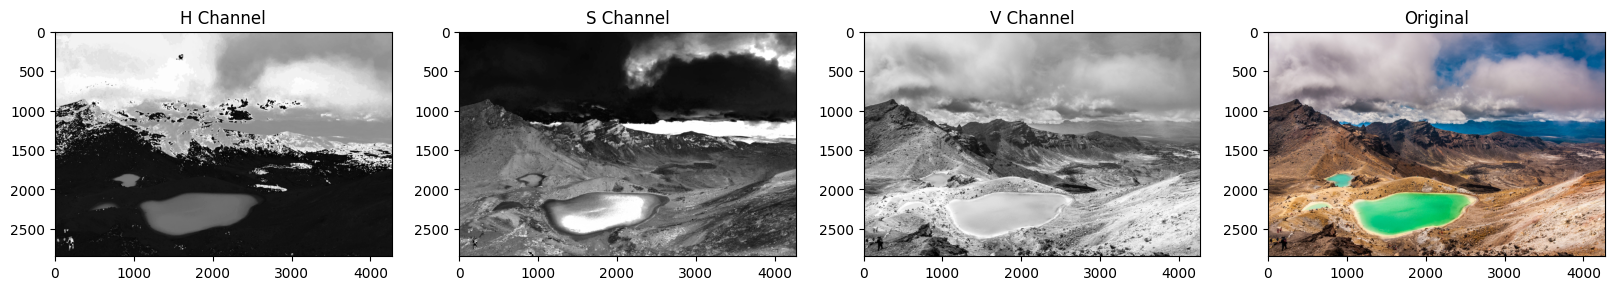

In [ ]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components.
h, s, v = cv2.split(img_hsv)

# Display the channels.
plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(h); plt.title("H Channel")
plt.subplot(142); plt.imshow(s); plt.title("S Channel")
plt.subplot(143); plt.imshow(v); plt.title("V Channel")
# Display the original image.
plt.subplot(144); plt.imshow(img_bgr[:, :, ::-1]); plt.title("Original");

### Modify one of the channels and then merge them back together
### Modifying Individual Color Channels

Text(0.5, 1.0, 'Modified')

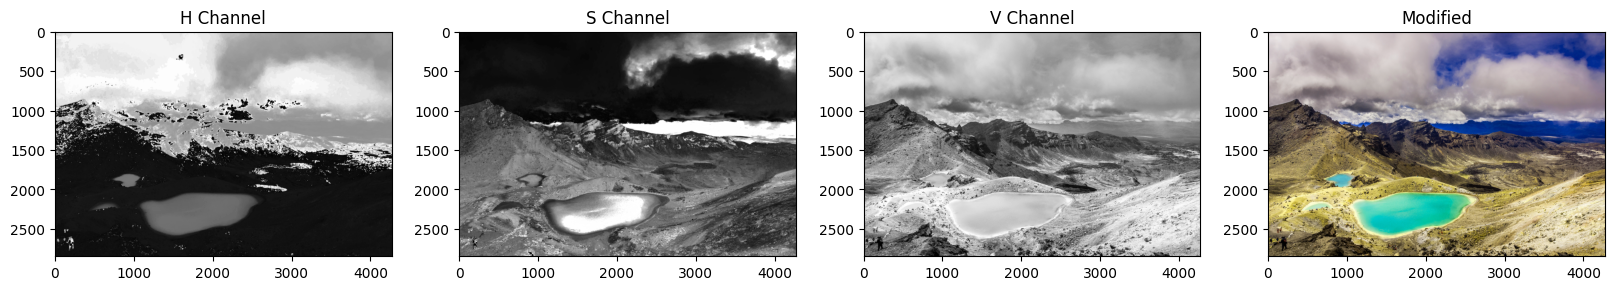

In [ ]:
h_new = h + 10
img_hsv_merged = cv2.merge((h_new, s, v))
img_rgb_merged = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2RGB)

# Displat the channels.
plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(h_new); plt.title("H Channel")
plt.subplot(142); plt.imshow(s); plt.title("S Channel")
plt.subplot(143); plt.imshow(v); plt.title("V Channel")
# Display the modified channel.
plt.subplot(144); plt.imshow(img_rgb_merged); plt.title("Modified")

# Exercise

(2848, 4272, 3)
(2848, 4272)


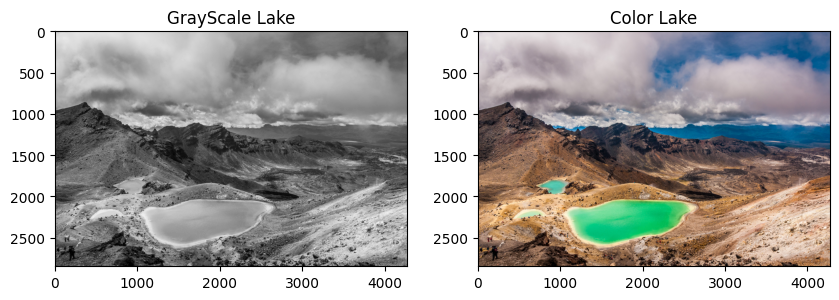

In [ ]:
# Read the saved image above ('Emerald_Lakes_New_Zealand.jpg') as a color image.
# YOUR CODE HERE
lake = cv2.imread("Emerald_Lakes_New_Zealand.jpg", cv2.IMREAD_COLOR)

# Print the image shape.
# YOUR CODE HERE
print(lake.shape)

# Convert the image to grayscale using cv2.cvtColor().
# YOUR CODE HERE
lake_gray = cv2.cvtColor(lake, cv2.COLOR_RGB2GRAY)
color_lake = cv2.cvtColor(lake, cv2.COLOR_BGR2RGB)

# Print the image shape.
# YOUR CODE HERE
print(lake_gray.shape)

# Display the image using matplotlib imshow()
# plt.figure(figsize = [10, 10])
# YOUR CODE HERE
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(lake_gray)
axes[0].set_title("GrayScale Lake")

axes[1].imshow(color_lake)
axes[1].set_title("Color Lake");